In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import cm
import torch
import os

import sys
sys.path.insert(0, '../trainingdata')
from datasaver import *
sys.path.insert(0, '../testproblems/tdarcy')
from manufacturedsolutions import *
sys.path.insert(0, '../ml')
from modelloader import loadmodelfromlabel
from NeuralOperator import NeuralOperator
from customlosses import *
from quadrature import *
from customlayers import discretize_functions
from basisfunctions import *

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# from NeuralOperator import NeuralOperator

# logdir = '../../../nnlogs'
# device = 'cpu'

# projection = loadmodelfromlabel(model=NeuralOperator, label='modelNGO', logdir=logdir, sublogdir=sublogdir, device=device)
# projection.hparams['modeltype'] = 'projection'
# projection.hparams['dtype'] = torch.float64
# projection.hparams['precision'] = 64

# sublogdir = 'systemnets/MLP'
# MLP = loadmodelfromlabel(model=NeuralOperator, label='NN', logdir=logdir, sublogdir=sublogdir, device=device)
# MLPmodelNGO = loadmodelfromlabel(model=NeuralOperator, label='modelNGO', logdir=logdir, sublogdir=sublogdir, device=device)

# sublogdir = 'systemnets/ResNet'
# ResNet = loadmodelfromlabel(model=NeuralOperator, label='NN', logdir=logdir, sublogdir=sublogdir, device=device)
# ResNetmodelNGO = loadmodelfromlabel(model=NeuralOperator, label='modelNGO', logdir=logdir, sublogdir=sublogdir, device=device)

# sublogdir = 'systemnets/CNN'
# CNN = loadmodelfromlabel(model=NeuralOperator, label='NN', logdir=logdir, sublogdir=sublogdir, device=device)
# CNNmodelNGO = loadmodelfromlabel(model=NeuralOperator, label='modelNGO', logdir=logdir, sublogdir=sublogdir, device=device)

# sublogdir = 'systemnets/U-Net'
# UNet = loadmodelfromlabel(model=NeuralOperator, label='NN', logdir=logdir, sublogdir=sublogdir, device=device)
# UNetmodelNGO = loadmodelfromlabel(model=NeuralOperator, label='modelNGO', logdir=logdir, sublogdir=sublogdir, device=device)

# sublogdir = 'systemnets/FNO'
# FNO = loadmodelfromlabel(model=NeuralOperator, label='NN', logdir=logdir, sublogdir=sublogdir, device=device)
# FNOmodelNGO = loadmodelfromlabel(model=NeuralOperator, label='modelNGO', logdir=logdir, sublogdir=sublogdir, device=device)

# modeldict = {'MLP': MLP,
#              'MLP model NGO': MLPmodelNGO,
#              'ResNet': ResNet,
#              'ResNet model NGO': ResNetmodelNGO,
#              'CNN': CNN,
#              'CNN model NGO': CNNmodelNGO,
#              'U-Net': UNet,
#              'U-Net model NGO': UNetmodelNGO,
#              'FNO': FNO,
#              'FNO model NGO': FNOmodelNGO}

# modeldict_NGO = {'MLP': MLP,
#              'MLP model NGO': MLPmodelNGO,
#              'ResNet': ResNet,
#              'ResNet model NGO': ResNetmodelNGO,
#              'CNN': CNN,
#              'CNN model NGO': CNNmodelNGO,
#              'U-Net': UNet,
#              'U-Net model NGO': UNetmodelNGO,
#              'FNO': FNO,
#              'FNO model NGO': FNOmodelNGO}

In [4]:
# N_samples = 10

# alpha = 0.05
# q_low = alpha/2
# q_high = 1 - q_low


# l = np.array([0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

# # l = np.array([1])

# # l = np.array([0.4, 0.3, 0.2, 0.1, 0.05])
# L2_scaled_avg = np.zeros((len(modeldict),len(l)))
# yerr = np.zeros((len(modeldict),2,len(l)))

# size_title = 20
# size_ticklabels = 15
# size_axeslabels = 20

# # quadrature = GaussLegendreQuadrature2D(n_elements=1, Q=100)
# quadrature = UniformQuadrature2D(Q=100)
# x = torch.tensor(quadrature.xi_Omega, device=device)
# w = torch.tensor(quadrature.w_Omega, device=device)

# linestyles=['-','dotted','--','dotted','--','dotted','--','dotted','--','--','--','--','--']
# colors = ['black','C0','C0','C1','C1','C2','C2','C3','C3','C4','C4']
# markers = ['o','^','o','^','o','^','o','^','o','^','o','^','o']
    
# for i in range(len(l)):
#     print(l[i])
#     dataset = ManufacturedSolutionsSetDarcy(N_samples=N_samples, variables=['x','x'], l_min=[l[i],l[i]], l_max=[l[i],l[i]], device=device)
#     theta = dataset.theta
#     f = dataset.f
#     etat = dataset.etat
#     etab = dataset.etab
#     gl = dataset.gl
#     gr = dataset.gr
#     u = dataset.u
#     m=0
#     for model in modeldict:
#         u_exact = discretize_functions(u, x, dtype=modeldict[str(model)].hparams['dtype'], device=device)
#         u_hat = modeldict[str(model)].simforward(theta, f, etab, etat, gl, gr, x, u).detach().cpu().numpy()
#         L2_scaled_array = weightedrelativeL2_set(w.detach().cpu().numpy(), u_hat, u_exact)
#         L2_scaled_avg[m,i] = np.average(L2_scaled_array)
#         q_l = np.quantile(L2_scaled_array, q_low)
#         q_h = np.quantile(L2_scaled_array, q_high)
#         yerr[m,:,i] = np.array([L2_scaled_avg[m,i] - q_l, -L2_scaled_avg[m,i] + q_h])
#         m+=1

# # L2_scaled_avg[L2_scaled_avg<0] = np.nan
# # yerr[yerr<0] = np.nan

# fig, ax = plt.subplots(1,1, figsize=(6, 4))
# fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

# plots = []
# plots.append(ax.axvspan(0.5,1, color='black', alpha=0.1, label='Training data range'))
# m=0
# ax.tick_params(axis='both', labelsize=size_ticklabels)
# ax.set_xlabel(r'Length scale $\lambda/L$', fontsize=size_axeslabels)
# ax.set_ylabel(r'Rel. L2 error $\frac{||\hat{u}-u||_2}{||u||_2}$', fontsize=size_axeslabels)
# ax.set_yscale('log')
# ax.set_xlim(0, 1.05)
# # ax.set_ylim(1e-7, 1e2)
# ax.set_yticks([1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2])
# # ax.set_yticks([1e-6, 1e-4, 1e-2, 1e0, 1e2])
# # ax.set_xscale('log')
# ax.grid()
# # ax.set_title('FNO', fontsize=size_title)
# for model in modeldict:
#     # ax.plot(l, L2_scaled_avg[m], color=colors[m], label=str(model), linestyle=linestyles[m], marker='o')
#     plots.append(ax.errorbar(l, L2_scaled_avg[m], yerr=yerr[m], fmt=".-", capsize=6, ms=8, label=str(model), color=colors[m], linestyle=linestyles[m], marker=markers[m]))
#         # plt.savefig(str(m)+".svg", bbox_inches='tight')#, transparent=True)
#     m+=1
#     # plt.legend(fontsize=10, loc='upper right')
#     # plt.savefig(str(m)+".svg", bbox_inches='tight')#, transparent=True)
# plt.legend(fontsize=10, ncols=2)
# # legend1 = ax.legend(handles=plots[0:2],fontsize=10, ncols=1, loc='lower left')
# # plt.gca().add_artist(legend1)
# # legend2 = ax.legend(handles=plots[2:],fontsize=10, ncols=2, loc='upper right')
# # plt.gca().add_artist(legend2)

# # plt.savefig("FNO.pdf", bbox_inches='tight')#, transparent=True)
# # plt.savefig("FNO.svg", bbox_inches='tight')#, transparent=True)

# plt.show()

In [5]:
from NeuralOperator import NeuralOperator

logdir = '../../../nnlogs'
device = 'cuda:3'

sublogdir = 'massconservation'

projection = loadmodelfromlabel(model=NeuralOperator, label='modelNGO_10x10x10', logdir=logdir, sublogdir=sublogdir, device=device)
projection.hparams['modeltype'] = 'projection'
projection.hparams['dtype'] = torch.float64
projection.hparams['discretization_device'] = device
projection.hparams['n_timesteps'] = 1
projection.hparams['Dt'] = 1
projection.hparams['output_coefficients'] = True
projection.__init__(projection.hparams)

FEM = loadmodelfromlabel(model=NeuralOperator, label='modelNGO_10x10x10', logdir=logdir, sublogdir=sublogdir, device=device)
FEM.hparams['modeltype'] = 'FEM'
FEM.hparams['dtype'] = torch.float64
FEM.hparams['discretization_device'] = device
FEM.hparams['n_timesteps'] = 1
FEM.hparams['Dt'] = 1
FEM.hparams['output_coefficients'] = True
FEM.__init__(FEM.hparams)

modelNGO = loadmodelfromlabel(model=NeuralOperator, label='modelNGO_10x10x10', logdir=logdir, sublogdir=sublogdir, device=device)
modelNGO.hparams['discretization_device'] = device
modelNGO.hparams['n_timesteps'] = 1
modelNGO.hparams['Dt'] = 1
modelNGO.hparams['output_coefficients'] = True
modelNGO.__init__(modelNGO.hparams)


modeldict = {'Projection': projection,
             'FEM': FEM,
             #'NN': NN,
             #'DeepONet': DeepONet,
             #'VarMiON': VarMiON,
            #'Data NGO': dataNGO,
            #'Data-free NGO': datafreeNGO,
            'Model NGO': modelNGO}

1
Projection
0
Memory allocated: 43.72 MB
Memory reserved: 804.00 MB
FEM
0
Memory allocated: 43.72 MB
Memory reserved: 3900.00 MB
Model NGO
0
Memory allocated: 43.22 MB
Memory reserved: 5112.00 MB


/tmp/ipykernel_1577825/1131047280.py:64: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string ".-" (-> linestyle='-'). The keyword argument will take precedence.
  plots.append(ax.errorbar(l, L2_scaled_avg[m], yerr=yerr[m], fmt=".-", capsize=6, ms=15, label=str(model), color=colors[m], linestyle=linestyles[m]))


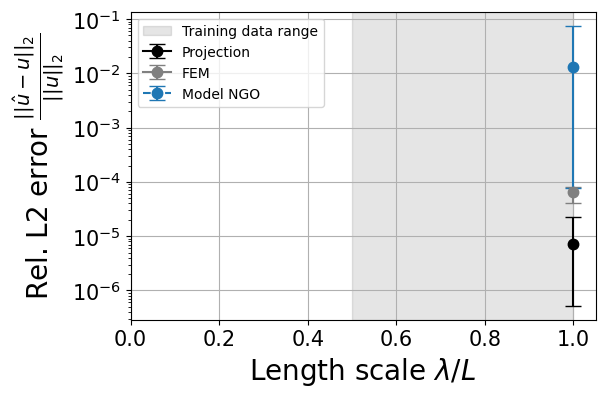

: 

In [ ]:
N_samples = 100

alpha = 0.05
q_low = alpha/2
q_high = 1 - q_low

# l = np.array([0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
l = np.array([1])


L2_scaled_avg = np.zeros((len(modeldict),len(l)))
yerr = np.zeros((len(modeldict),2,len(l)))

size_title = 20
size_ticklabels = 15
size_axeslabels = 20

quadrature = GaussLegendreQuadrature(n_elements=[3,3,3], Q=[99,99,99])
x = quadrature.xi
w = quadrature.w

linestyles=['-','-','--','--','--','--','--','--','--','--']
colors = ['black','grey','C0','C2','C3','C4']
    
for i in range(len(l)):
    print(l[i])
    dataset = ManufacturedSolutionsSet(N_samples=N_samples, variables=['t','x','x'], l_min=[0.75,l[i],l[i]], l_max=[0.75,l[i],l[i]], device=device)
    theta = dataset.theta
    f = dataset.f
    etat = dataset.etat
    etab = dataset.etab
    gl = dataset.gl
    gr = dataset.gr
    u = dataset.u
    u0 = dataset.u0
    m=0
    for model in modeldict:
        print(str(model))
        u_exact = discretize_functions(u, x, dtype=modeldict[str(model)].hparams['dtype'], device=device)
        u_hat = modeldict[str(model)].simforward(theta, f, etab, etat, gl, gr, u0, x, u)
        print(f"Memory allocated: {torch.cuda.memory_allocated(device) / 1024 ** 2:.2f} MB")
        print(f"Memory reserved: {torch.cuda.memory_reserved(device) / 1024 ** 2:.2f} MB")
        L2_scaled_array = weightedrelativeL2_set(w, u_hat, u_exact)
        L2_scaled_avg[m,i] = np.average(L2_scaled_array)
        q_l = np.quantile(L2_scaled_array, q_low)
        q_h = np.quantile(L2_scaled_array, q_high)
        yerr[m,:,i] = np.array([L2_scaled_avg[m,i] - q_l, -L2_scaled_avg[m,i] + q_h])
        m+=1

fig, ax = plt.subplots(1,1, figsize=(6, 4))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

plots = []
plots.append(ax.axvspan(0.5,1, color='black', alpha=0.1, label='Training data range'))
m=0
ax.tick_params(axis='both', labelsize=size_ticklabels)
ax.set_xlabel(r'Length scale $\lambda/L$', fontsize=size_axeslabels)
ax.set_ylabel(r'Rel. L2 error $\frac{||\hat{u}-u||_2}{||u||_2}$', fontsize=size_axeslabels)
ax.set_yscale('log')
ax.set_xlim(0, 1.05)
ax.grid()
# ax.set_title('FNO', fontsize=size_title)
for model in modeldict:
    plots.append(ax.errorbar(l, L2_scaled_avg[m], yerr=yerr[m], fmt=".-", capsize=6, ms=15, label=str(model), color=colors[m], linestyle=linestyles[m]))
    m+=1
plt.legend(fontsize=10, ncols=1)
# legend1 = ax.legend(handles=plots[0:2],fontsize=10, ncols=1, loc='lower left')
# plt.gca().add_artist(legend1)
# legend2 = ax.legend(handles=plots[2:],fontsize=10, ncols=2, loc='upper right')
# plt.gca().add_artist(legend2)

# plt.savefig("FNO.pdf", bbox_inches='tight')#, transparent=True)
# plt.savefig("lengthscales.svg", bbox_inches='tight')#, transparent=True)
# plt.savefig("lengthscales.pdf", bbox_inches='tight')#, transparent=True)

plt.show()

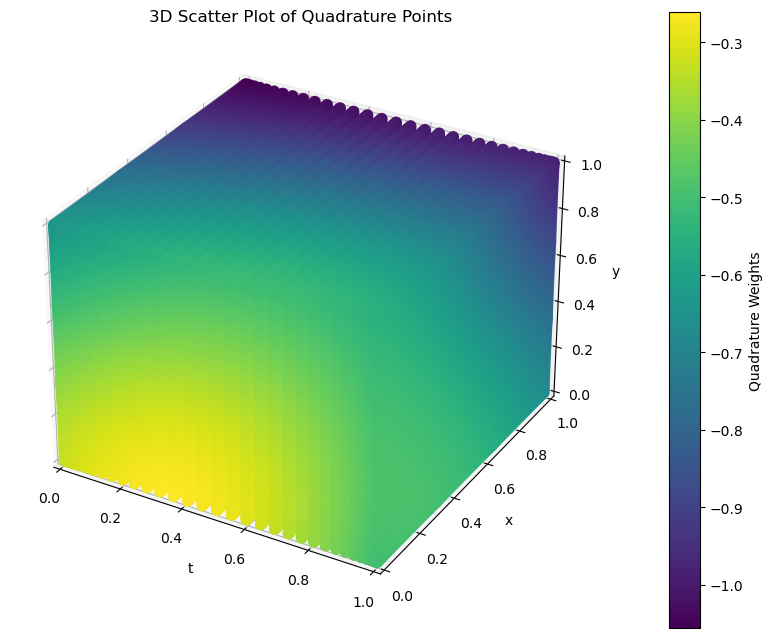

In [31]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with weights determining the color
sc = ax.scatter(x[:,0], x[:,1], x[:,2],
            c=u_exact[0], cmap='viridis', s=50)

# Add colorbar and labels
cbar = plt.colorbar(sc, ax=ax, pad=0.1)
cbar.set_label('Quadrature Weights')
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('y')
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_zlim(0,1)

# plt.savefig("ndquadrature.svg", bbox_inches='tight')#, transparent=True)

plt.show()

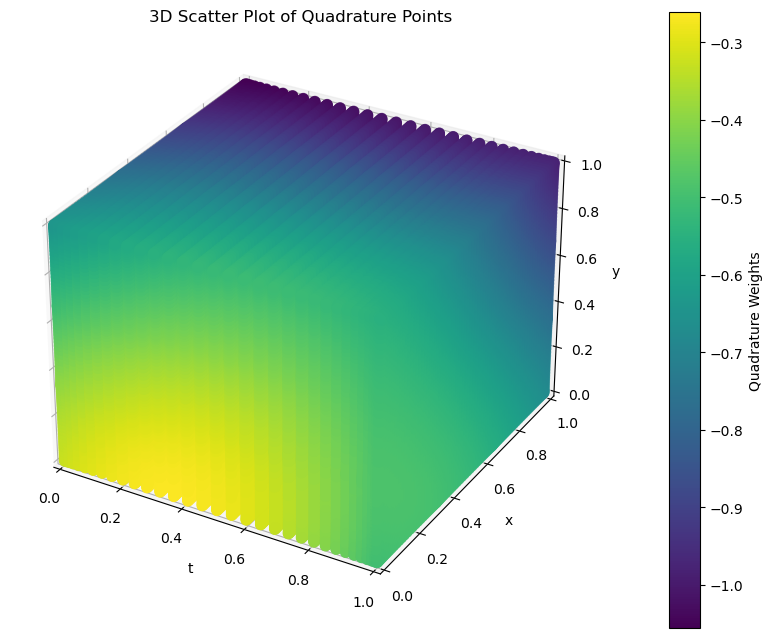

In [32]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with weights determining the color
sc = ax.scatter(x[:,0], x[:,1], x[:,2],
            c=u_hat[0], cmap='viridis', s=50)

# Add colorbar and labels
cbar = plt.colorbar(sc, ax=ax, pad=0.1)
cbar.set_label('Quadrature Weights')
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('y')
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_zlim(0,1)

# plt.savefig("ndquadrature.svg", bbox_inches='tight')#, transparent=True)

plt.show()

In [180]:
N_samples = 100

alpha = 0.05
q_low = alpha/2
q_high = 1 - q_low


tau = np.array([0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
# tau = np.array([1])


L2_scaled_avg = np.zeros((len(modeldict),len(tau)))
yerr = np.zeros((len(modeldict),2,len(tau)))

size_title = 20
size_ticklabels = 15
size_axeslabels = 20

quadrature = GaussLegendreQuadrature(n_elements=[3,3,3], Q=[12,12,12])
x = quadrature.xi
w = quadrature.w

linestyles=['-','-','--','--','--','--','--','--','--','--']
colors = ['black','C0','C2','C3','C4']
    
for i in range(len(tau)):
    print(tau[i])
    dataset = ManufacturedSolutionsSet(N_samples=N_samples, variables=['t','x','x'], l_min=[tau[i],1,1], l_max=[tau[i],1,1], device=device)
    theta = dataset.theta
    f = dataset.f
    etat = dataset.etat
    etab = dataset.etab
    gl = dataset.gl
    gr = dataset.gr
    u = dataset.u
    u0 = dataset.u0
    m=0
    for model in modeldict:
        print(str(model))
        modeldict[str(model)].hparams['assembly_batch_size'] = N_samples
        print(f"Memory allocated: {torch.cuda.memory_allocated(device) / 1024 ** 2:.2f} MB")
        print(f"Memory reserved: {torch.cuda.memory_reserved(device) / 1024 ** 2:.2f} MB")
        u_exact = discretize_functions(u, x, dtype=modeldict[str(model)].hparams['dtype'], device=device)
        print(f"Memory allocated: {torch.cuda.memory_allocated(device) / 1024 ** 2:.2f} MB")
        print(f"Memory reserved: {torch.cuda.memory_reserved(device) / 1024 ** 2:.2f} MB")
        u_hat = modeldict[str(model)].simforward(theta, f, etab, etat, gl, gr, u0, x, u)
        print(f"Memory allocated: {torch.cuda.memory_allocated(device) / 1024 ** 2:.2f} MB")
        print(f"Memory reserved: {torch.cuda.memory_reserved(device) / 1024 ** 2:.2f} MB")
        L2_scaled_array = weightedrelativeL2_set(w, u_hat, u_exact)
        L2_scaled_avg[m,i] = np.average(L2_scaled_array)
        q_l = np.quantile(L2_scaled_array, q_low)
        q_h = np.quantile(L2_scaled_array, q_high)
        yerr[m,:,i] = np.array([L2_scaled_avg[m,i] - q_l, -L2_scaled_avg[m,i] + q_h])
        m+=1

fig, ax = plt.subplots(1,1, figsize=(6, 4))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

plots = []
plots.append(ax.axvspan(0.5,1, color='black', alpha=0.1, label='Training data range'))
m=0
ax.tick_params(axis='both', labelsize=size_ticklabels)
ax.set_xlabel(r'Time scale $\tau/T$', fontsize=size_axeslabels)
ax.set_ylabel(r'Rel. L2 error $\frac{||\hat{u}-u||_2}{||u||_2}$', fontsize=size_axeslabels)
ax.set_yscale('log')
ax.set_xlim(0, 1.05)
ax.grid()
# ax.set_title('FNO', fontsize=size_title)
for model in modeldict:
    plots.append(ax.errorbar(tau, L2_scaled_avg[m], yerr=yerr[m], fmt=".-", capsize=6, ms=15, label=str(model), color=colors[m], linestyle=linestyles[m]))
    m+=1
plt.legend(fontsize=10, ncols=1)
# legend1 = ax.legend(handles=plots[0:2],fontsize=10, ncols=1, loc='lower left')
# plt.gca().add_artist(legend1)
# legend2 = ax.legend(handles=plots[2:],fontsize=10, ncols=2, loc='upper right')
# plt.gca().add_artist(legend2)

# plt.savefig("FNO.pdf", bbox_inches='tight')#, transparent=True)
plt.savefig("timescales.svg", bbox_inches='tight')#, transparent=True)
plt.savefig("timescales.pdf", bbox_inches='tight')#, transparent=True)
plt.show()

0.05
Projection
Memory allocated: 1494.15 MB
Memory reserved: 1982.00 MB
Memory allocated: 1494.15 MB
Memory reserved: 1982.00 MB
0
[[ 0.29714835  0.29595125  0.29908989 ...  0.27522226  0.2041999
   0.15449602]
 [ 0.57055563  0.57922604  0.57970209 ... -0.00516788  0.01901144
   0.03567799]
 [ 0.02927382  0.03224573  0.03105939 ... -0.36555752 -0.29662192
  -0.24753844]
 ...
 [ 0.41593814  0.41286608  0.41313705 ...  0.50738344  0.50676257
   0.50638943]
 [ 1.10392895  1.10621003  1.1063359  ...  0.95181036  0.93836336
   0.92962295]
 [ 0.85366917  0.8767341   0.90735847 ... -0.22537216 -0.26341613
  -0.28180402]]
[[ 0.3700982   0.37003765  0.36993048 ...  0.47955775  0.4799003
   0.48009151]
 [ 0.25916821  0.25932649  0.25960624 ... -0.61941946 -0.61982512
  -0.62004864]
 [-0.17029759 -0.17020339 -0.17003606 ... -0.36784992 -0.36750886
  -0.36731884]
 ...
 [ 0.51277786  0.51276052  0.51272982 ...  0.5875122   0.58749568
   0.58748627]
 [ 1.27673757  1.27683353  1.27700245 ...  0.4562

ValueError: operands could not be broadcast together with shapes (100,1728) (100,323433) 